<a href="https://colab.research.google.com/github/Nasrin-Akhtar/Life_Expectancy-WHO-_prediction/blob/main/Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**

In [286]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import random

import scipy.stats as stats
import statsmodels.api as sm
import pylab as py

#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, Ridge,LinearRegression
from sklearn.linear_model import ElasticNet, BayesianRidge
from sklearn.ensemble import  RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [254]:
df= pd.read_csv('/content/Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis-B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness(1-19)years,thinness(5-9)years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [255]:
df.shape

(2938, 22)

In [256]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis-B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness(1-19)years                34
 thinness(5-9)years                 34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [257]:
df.duplicated().sum()

0

In [258]:
df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis-B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness(1-19)years,thinness(5-9)years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [259]:
cols=['Life_expectancy ','Alcohol','Polio','Diphtheria',' thinness(1-19)years',' thinness(5-9)years']
for i in cols:
  df[i]=df[i].fillna(value=df[i].mean())
cols2=['Adult_Mortality','Hepatitis-B','BMI','Total_expenditure','GDP','Population','Income_composition_of_resources','Schooling']
for j in cols2:
  df[j]=df[j].fillna(value=df[j].median())

#df['Life_expectancy ']=df['Life_expectancy '].fillna(value=df['Life_expectancy '].mean())
#df['Life_expectancy ']=df['Life_expectancy '].fillna(value=df['Life_expectancy '].mean())
#df['Life_expectancy ']=df['Life_expectancy '].fillna(value=df['Life_expectancy '].mean())

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2938 non-null   float64
 4   Adult_Mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis-B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

#**Summary Statistics**

In [261]:
def summary(df):
    df.shape
    print(f"Dataset has {df.shape[1]} features and {df.shape[0]} observations.")
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary["Types"] = df.dtypes
    return summary
summary(df)

Dataset has 22 features and 2938 observations.


,Unique,Missing,Types
Country,193,0,object
Year,16,0,int64
Status,2,0,object
Life_expectancy,363,0,float64
Adult_Mortality,425,0,float64
infant_deaths,209,0,int64
Alcohol,1077,0,float64
percentage expenditure,2328,0,float64
Hepatitis-B,87,0,float64
Measles,958,0,int64


In [262]:
def distribution(data,feature):
    sns.displot(data[feature],kind='kde')
    print(data[feature].agg(['skew','kurtosis']))

skew       -0.639693
kurtosis   -0.225027
Name: Life_expectancy , dtype: float64


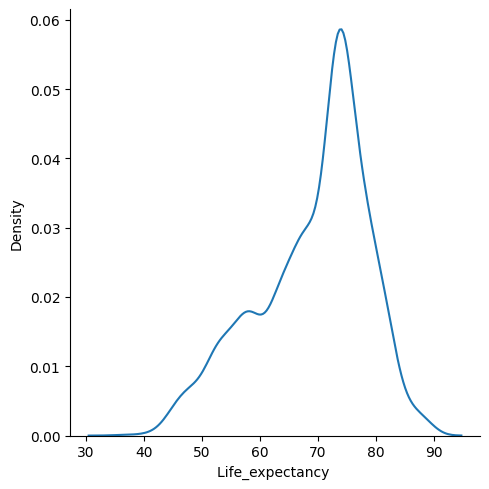

In [263]:
distribution(df,'Life_expectancy ')

In [264]:
num_cols = df.select_dtypes(exclude='object').columns.drop("Life_expectancy ").tolist()

In [265]:
def rand_color():
  c = "#"+"".join(map(hex,random.choices(range(256), k=3))).replace("0x","")
  if len(c) != 7:
    return rand_color()
  return c

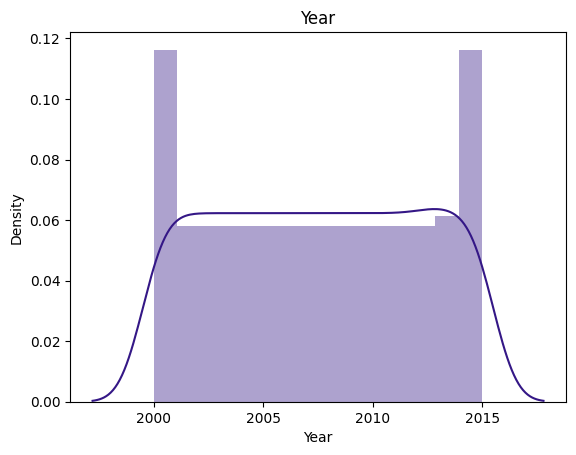

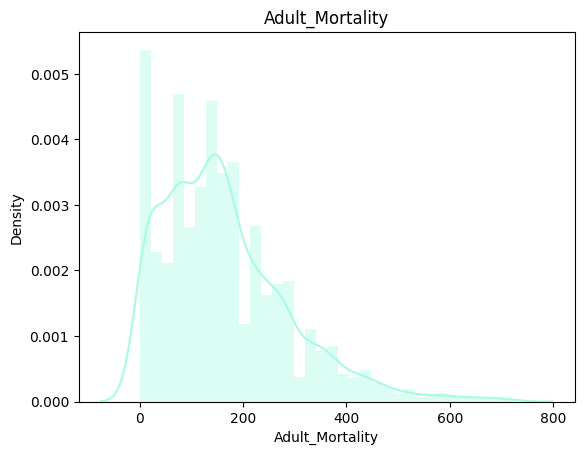

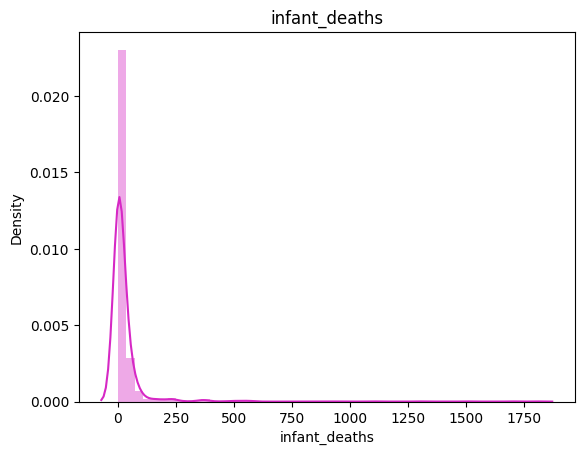

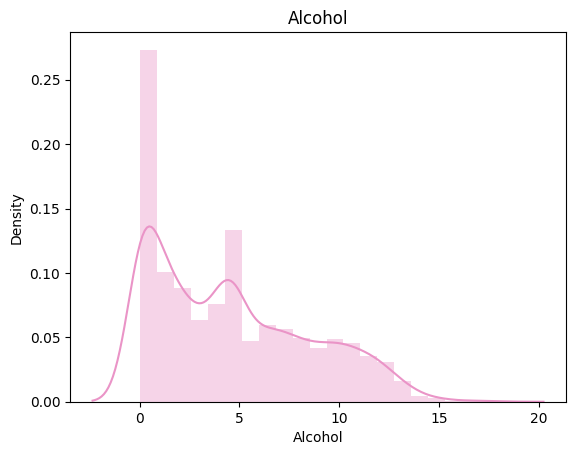

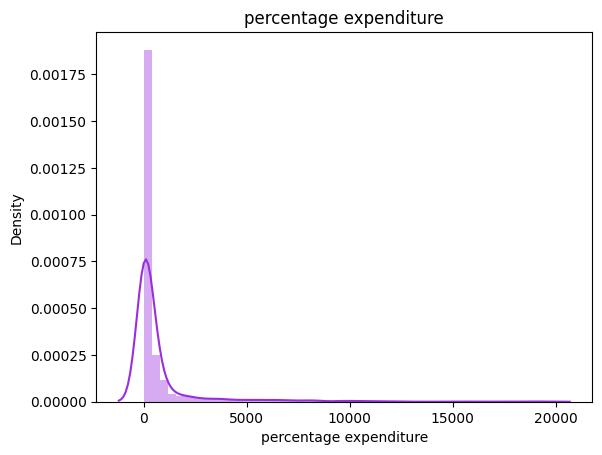

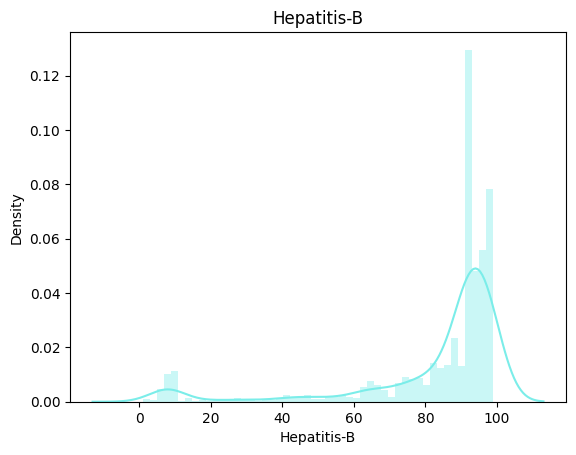

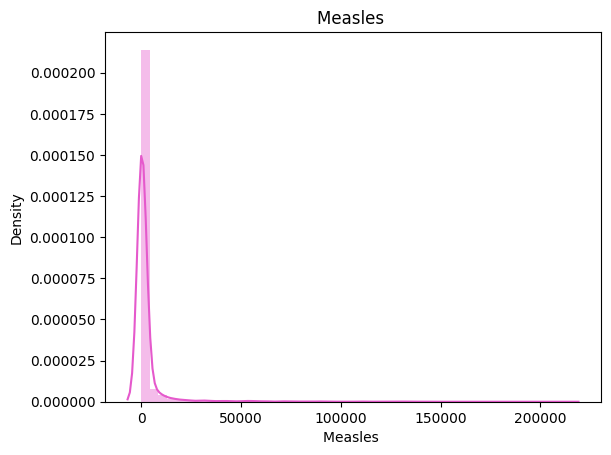

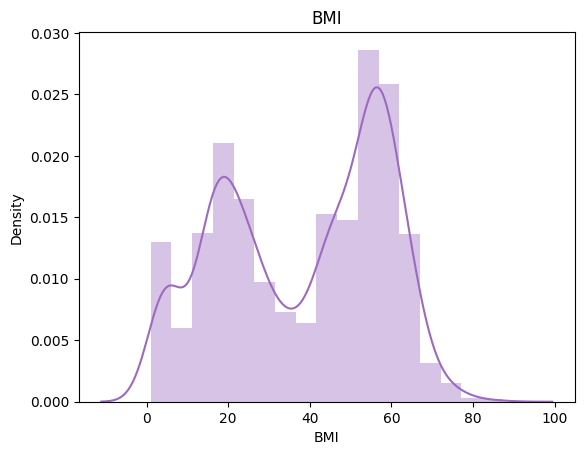

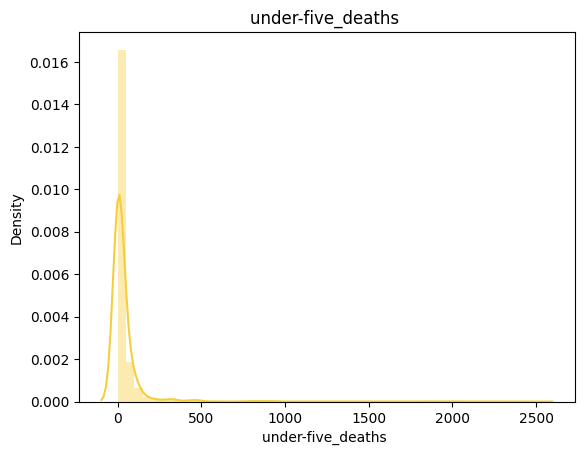

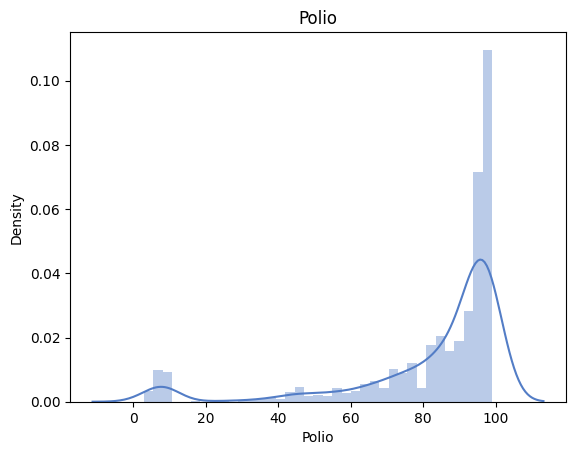

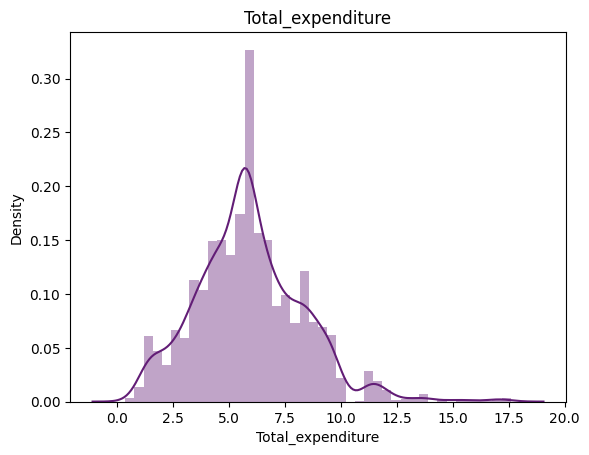

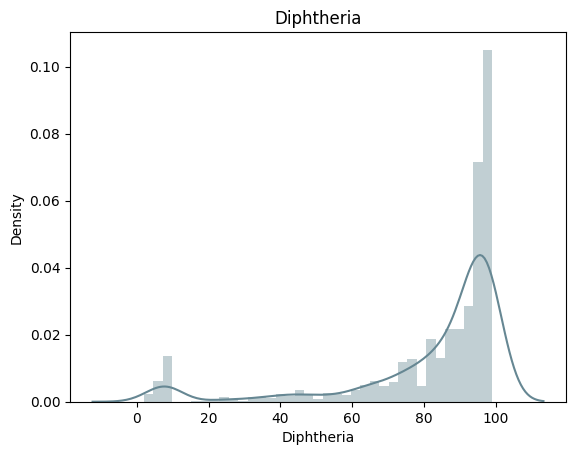

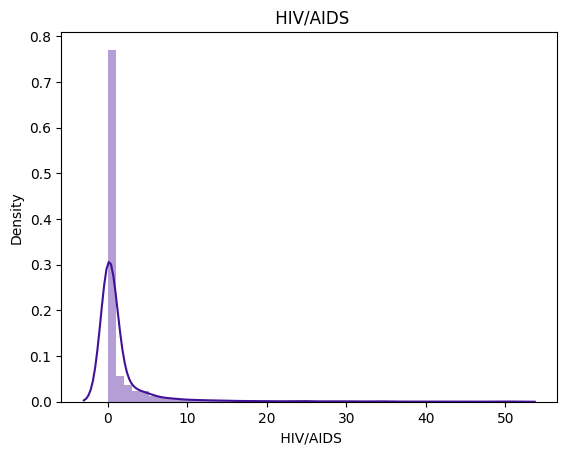

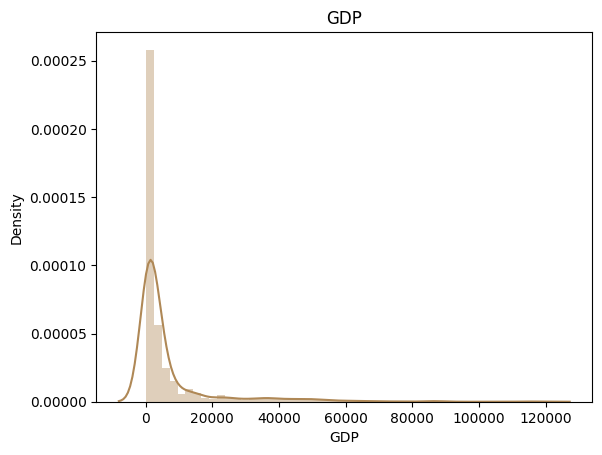

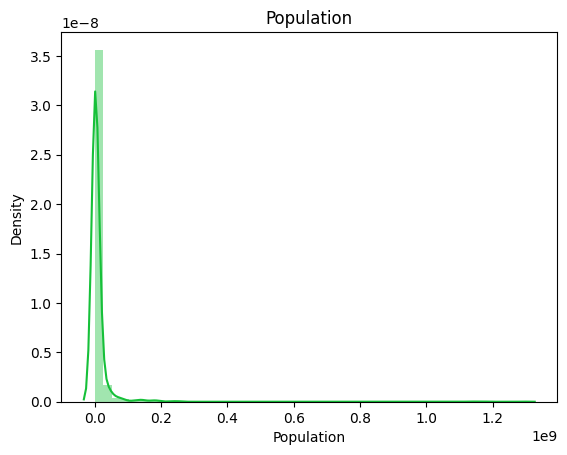

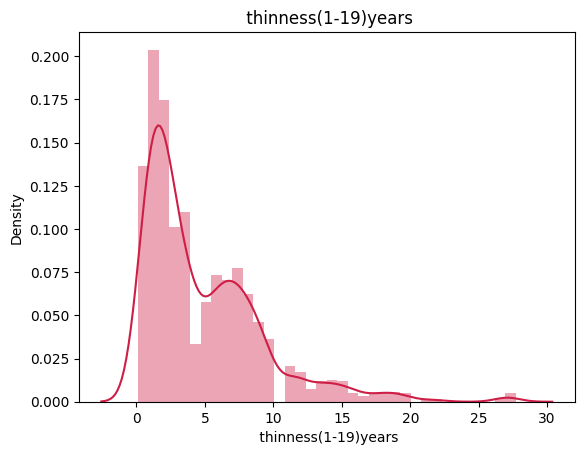

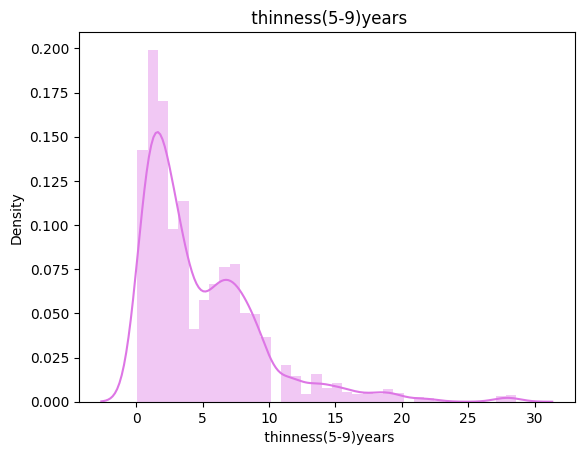

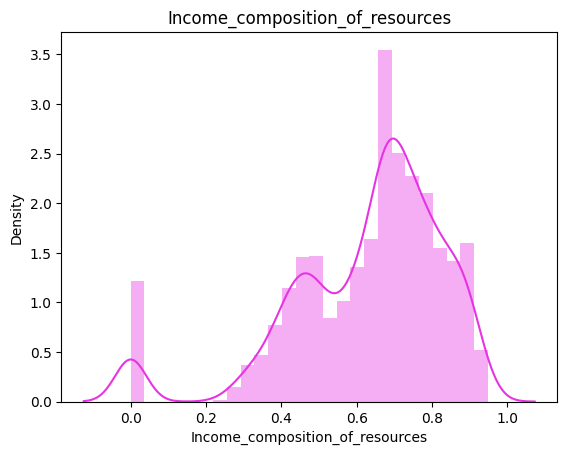

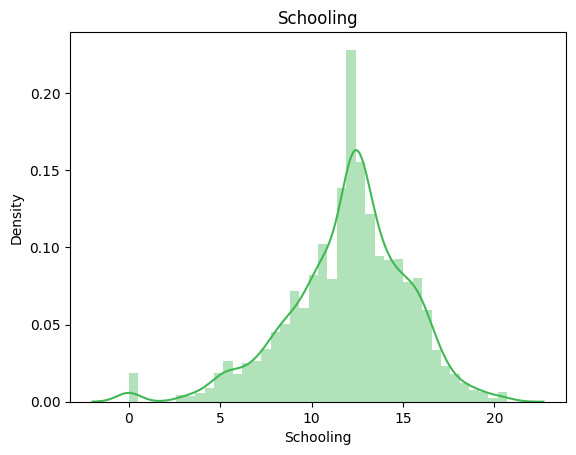

In [266]:
for i in num_cols:
  print("\n")
  #plt.figsize(figsize=(12,8))
  sns.distplot(df[i], color = rand_color()).set(title = i)
  plt.show()


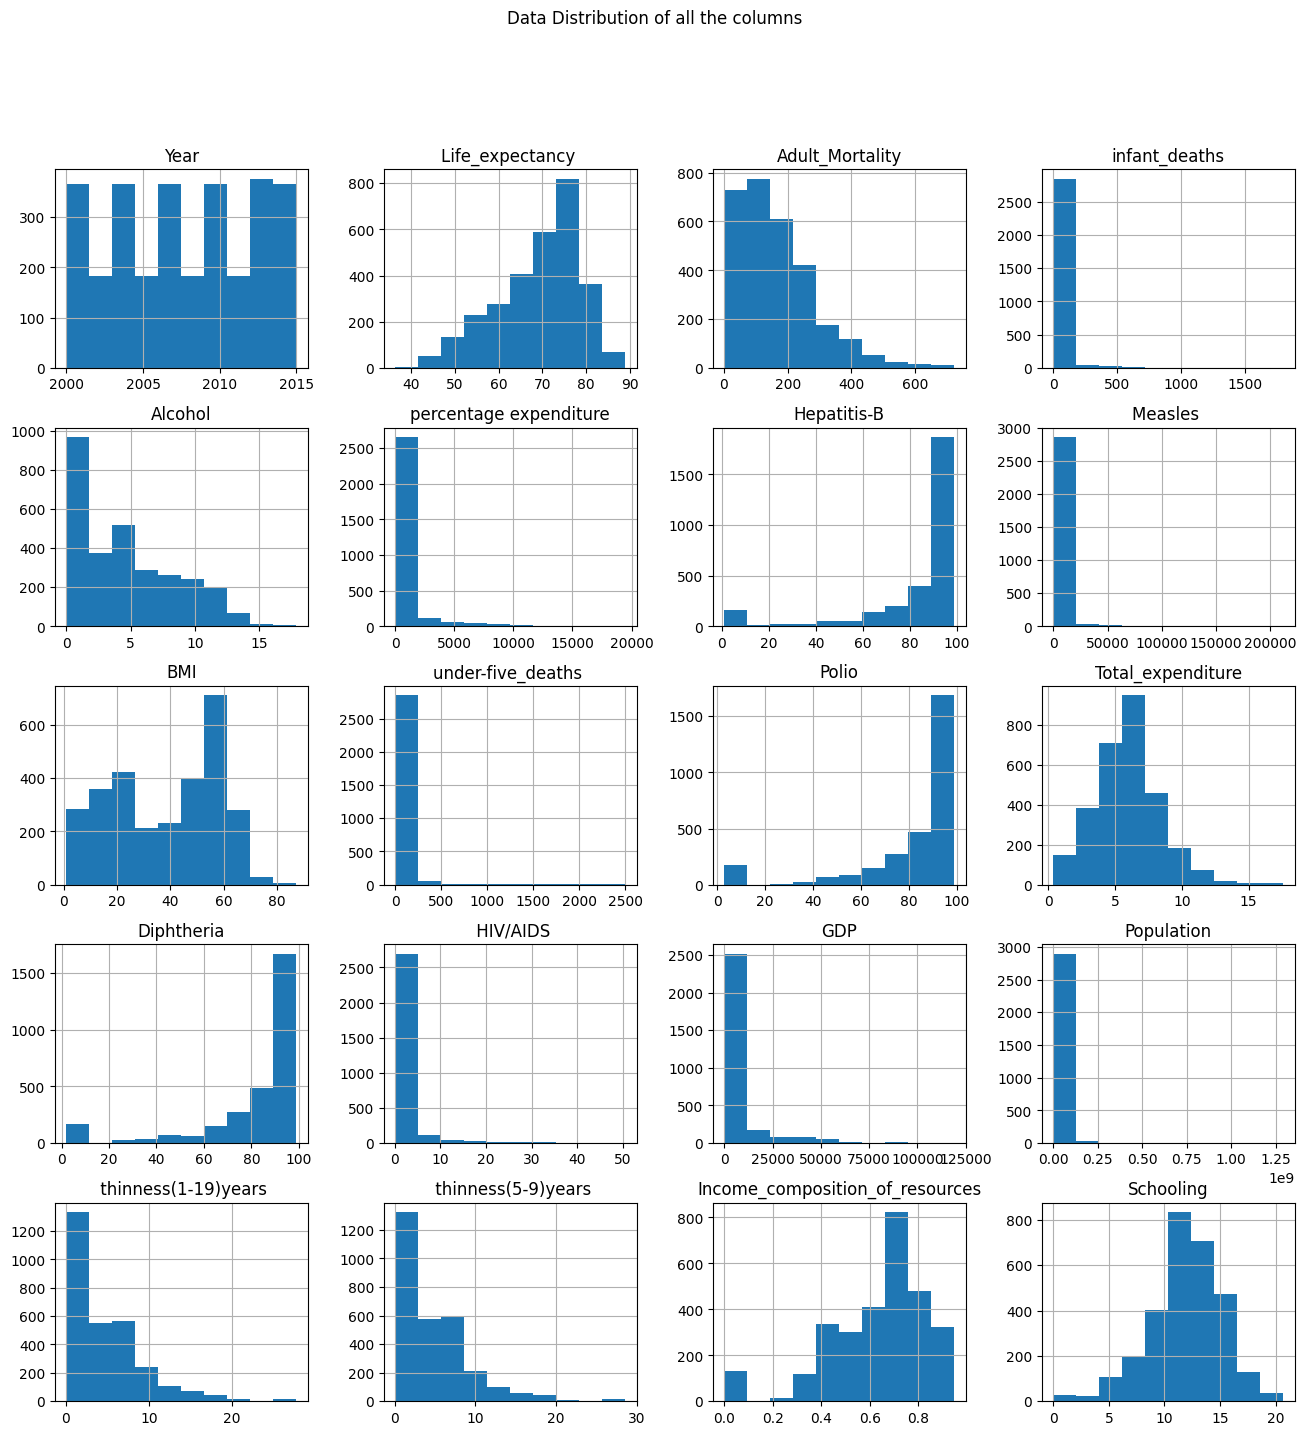

In [267]:
df.hist(bins=10, figsize=(16,16) )
plt.suptitle("Data Distribution of all the columns")
plt.show()

In [268]:
fig = ff.create_distplot([df['Life_expectancy ']], group_labels = ['Life_expectancy '])
fig.show()

In [269]:
fig1=px.line(df.sort_values(by='Year'),x='Year',y='Life_expectancy ',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
fig1.show()

In [270]:
def bivariate_plotting(df):
    selected_columns=['infant_deaths', 'Adult_Mortality','Alcohol','Schooling','Total_expenditure','Population']
    for item in selected_columns:
      plot=px.scatter(df,x=item,y='Life_expectancy ')
      fig=plot.update_layout(title_text=f'Life_Expectancy vs{item}', title_x=0.5)
      fig.show()
bivariate_plotting(df)

<Axes: xlabel='count', ylabel='Status'>

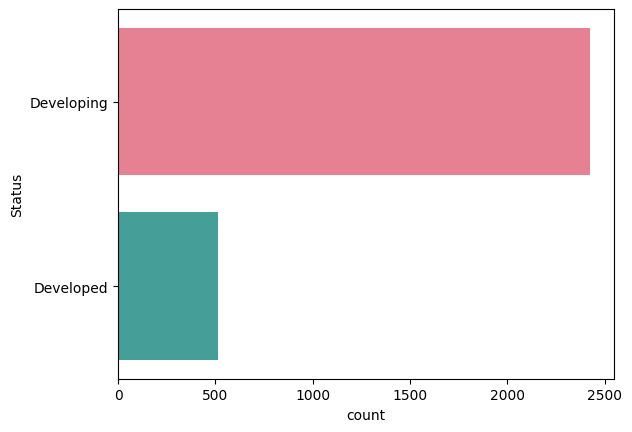

In [271]:

sns.countplot(data=df, y= 'Status', order=df["Status"].value_counts().index, palette= "husl")

In [272]:
dummy_df=df.groupby(['Status'])['Life_expectancy '].mean()
fig=px.bar(dummy_df,x=dummy_df.index,y=dummy_df.values,title=f'Life Expectancy with respect to  Status')
fig.update_layout(xaxis_title='Status', yaxis_title='Life_expectancy ',height=600,width=800)
fig.show()

<Axes: >

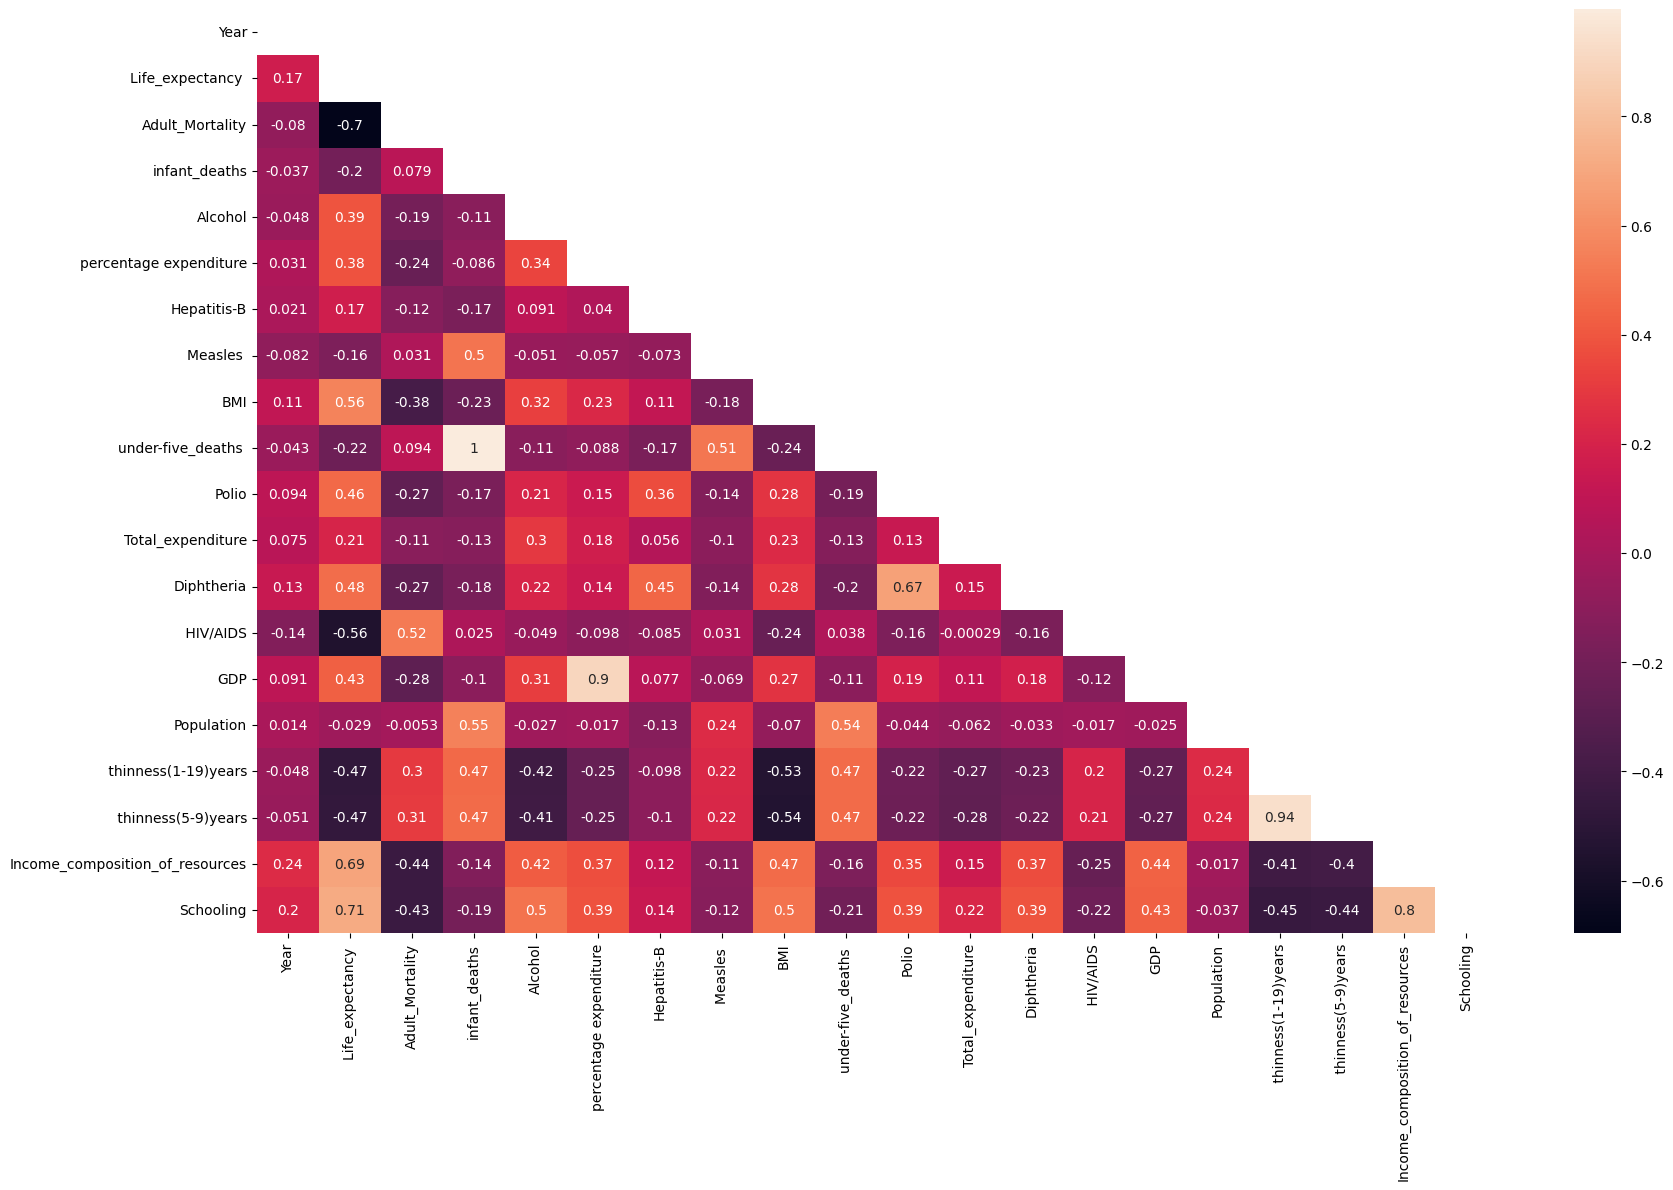

In [273]:
plt.figure(figsize=(20,12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),annot=True,mask=mask)

# **Feature Engineering**

In [274]:
drop_col=['under-five_deaths ', ' thinness(5-9)years','Year']
df.drop(columns=drop_col,axis=1, inplace=True)


In [275]:
new_df=df.copy()
new_df["Status"] = new_df["Status"].replace({'Developing':0,'Developed':1}).astype(int)
dummy = pd.get_dummies(df['Country'], drop_first= True,dtype=int)


In [277]:
dummy_df=pd.concat([new_df,dummy],axis=1)
dummy_df.drop('Country',axis=1, inplace=True)
dummy_df.head()

,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis-B,Measles,BMI,Polio,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,...,0,0,0,0,0,0,0,0,0,0
1,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,...,0,0,0,0,0,0,0,0,0,0
2,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,...,0,0,0,0,0,0,0,0,0,0
3,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,...,0,0,0,0,0,0,0,0,0,0
4,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,...,0,0,0,0,0,0,0,0,0,0


In [278]:
def make_mi_scores(X,Y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname]= X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X,Y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores,name="MI Scores",index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [281]:
X=dummy_df.copy()
y=X.pop('Life_expectancy ')
mi_scores = make_mi_scores(X, y)

In [282]:
mm=mi_scores.sort_values(ascending=True)
print(mi_scores.sort_values(ascending=True))

selected_columns = mi_scores[mi_scores > 0].index

X_new=dummy_df[selected_columns]
X_new.head()
X_new.shape#mutual info regressor score to check dependency

Saint Kitts and Nevis              2.220446e-16
Tuvalu                             2.220446e-16
Niue                               2.220446e-16
Marshall Islands                   2.220446e-16
Cook Islands                       2.220446e-16
                                       ...     
BMI                                5.715647e-01
Schooling                          6.744599e-01
 thinness(1-19)years               7.766992e-01
Income_composition_of_resources    9.172428e-01
Adult_Mortality                    1.277182e+00
Name: MI Scores, Length: 209, dtype: float64


(2938, 209)

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2350, 209), (588, 209), (2350,), (588,))

In [288]:
scaler=MinMaxScaler()
x_scaled = scaler.fit_transform(X_train)
x_scaled_test=scaler.transform(X_test)

In [289]:
models=[('LR',LinearRegression(positive=True)),
       ('Lasso', Lasso(positive=True)),
        ('Ridge', Ridge(positive=True)),
        ('Bayesian Ridge', BayesianRidge()),
        ('Random Forest', RandomForestRegressor())]

In [290]:
for name,model in models:
    pipeline = Pipeline([('model',model)])
    pipeline.fit(x_scaled, y_train)
    y_pred = pipeline.predict(x_scaled_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,y_pred)
    R2_score=r2_score(y_test,y_pred)
    print( name, ":",rmse, R2_score)

LR : 2.682279925803872 0.9169550112010454
Lasso : 7.9057071046365 0.278582500623919
Ridge : 2.969138168333434 0.8982425891929005
Bayesian Ridge : 2.07211989773589 0.9504395781503456
Random Forest : 1.6836850595521253 0.9672789713272505


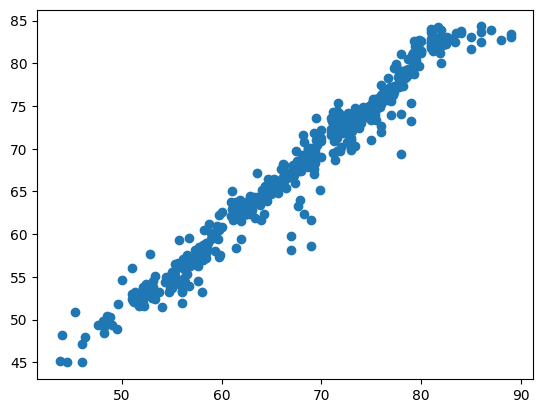

In [291]:
plt.scatter(y_test,y_pred)